<a href="https://colab.research.google.com/github/Huthaifa-Janazreh/Car-Insurance-/blob/main/CarInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
set_config(transform_output='pandas')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Project4/Car_Insurance_Claim.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

- What is the target? (You are required to complete a classification task for this project) What does one row represent? (A person? A business? An event? A  product?)

- How many features does the data have? How many rows are in the dataset?

- What opportunities exist for dimensionality reduction or feature selection with this dataset?

- What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

###  Dataset Overview

After loading the dataset and checking its structure with `df.info()`, we can summarize the following:

---

####  Target Variable
- The target variable is **`OUTCOME`**, which likely represents whether a customer **filed an insurance claim (1)** or **did not file a claim (0)**.  
- This makes the task a **binary classification problem**.

---

####  What One Row Represents
- Each row represents **one individual driver (policyholder)** and their corresponding demographic, financial, and driving-related information.  

####  Dataset Dimensions
- **Number of rows:** 10,000  
- **Number of features:** 19

####  Potential Challenges
1. **Missing Values:**  
   - `CREDIT_SCORE` (≈10% missing)  
   - `ANNUAL_MILEAGE` (≈9.6% missing)  
   Imputation will be needed — possibly median or model-based.
2. **Categorical Encoding:**  
   - Many categorical columns with ordinal meaning (e.g., `AGE`, `DRIVING_EXPERIENCE`, `EDUCATION`) need **ordinal encoding**.
   - Others (e.g., `GENDER`, `RACE`, `VEHICLE_TYPE`) require **one-hot encoding**.
3. **Class Imbalance:**  
   - The target `OUTCOME` might be imbalanced (to be verified with `df['OUTCOME'].value_counts()`).
4. **Mixed Data Types:**  
   - Several numeric-looking columns (`AGE`, `INCOME`, etc.) are stored as strings and must be converted.
5. **Scaling:**  
   - Numerical features vary in range and may require normalization or standardization for certain models.

In [ ]:
# drop id (irrelevent)
df.drop(['ID','POSTAL_CODE'], axis=1, inplace=True)

Text(0.5, 1.0, 'Distribution of Insurance Claim Outcome')

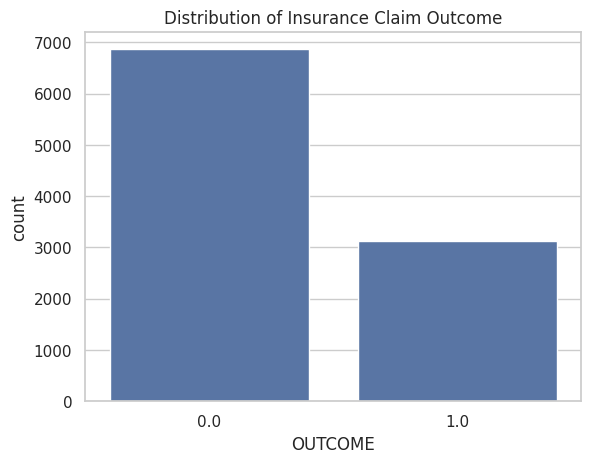

In [ ]:
sns.set(style = 'whitegrid')
sns.countplot(x = 'OUTCOME', data = df)
plt.title("Distribution of Insurance Claim Outcome")

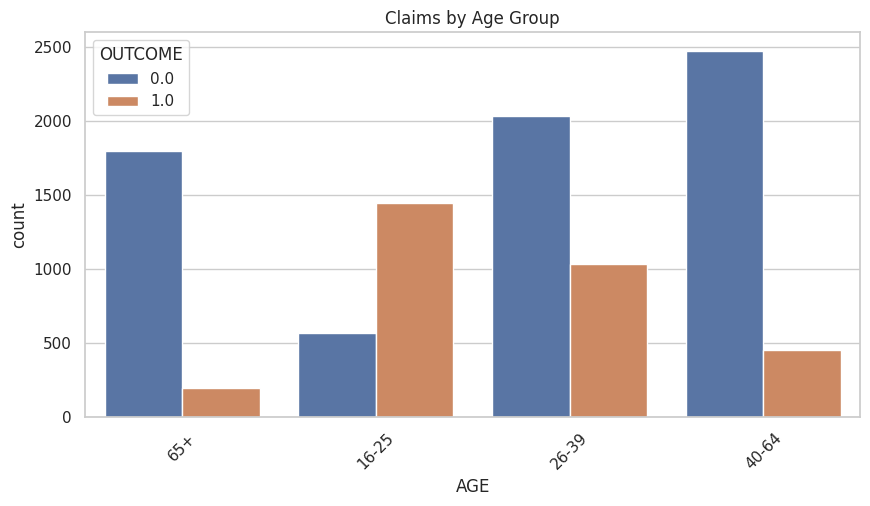

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='AGE', hue='OUTCOME', data=df)
plt.title('Claims by Age Group')
plt.xticks(rotation=45)
plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

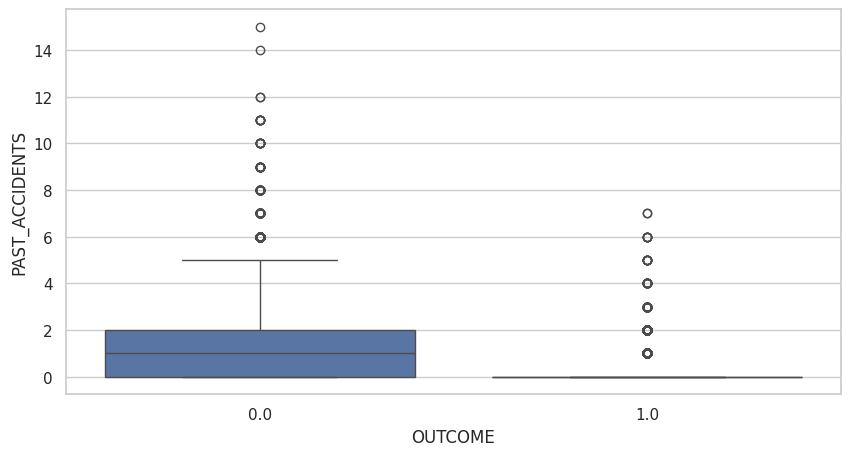

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'OUTCOME', y = 'PAST_ACCIDENTS', data = df)
plt

## Distribution of Past Accidents

**The left box `(OUTCOME = 0)` represents drivers who did not file a claim.**

- These drivers tend to have more past accidents, with several outliers going up to **14 previous accidents.**


- The **median is around 1 accident, but the spread (IQR) is wide**, indicating varied accident histories.


**The right box `(OUTCOME = 1)` represents drivers who did file a claim.**

- Surprisingly, most of them show **fewer or no past accidents, with very few outliers.**


- The median is **0 accidents, and the box is much narrower.**

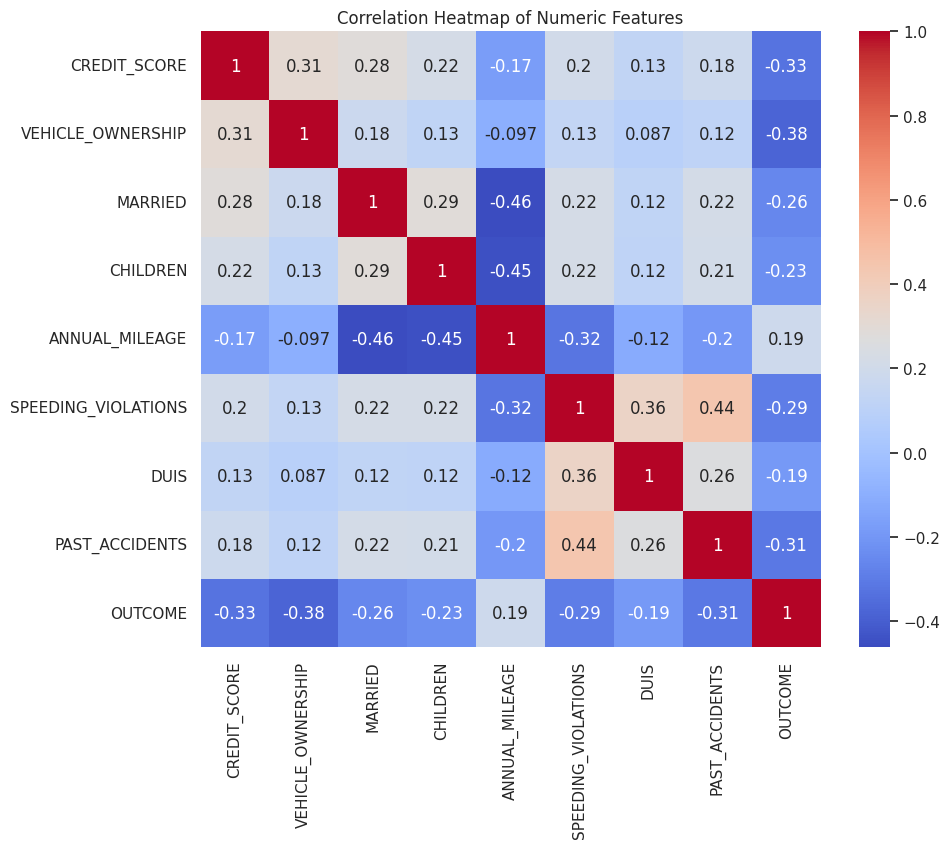

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

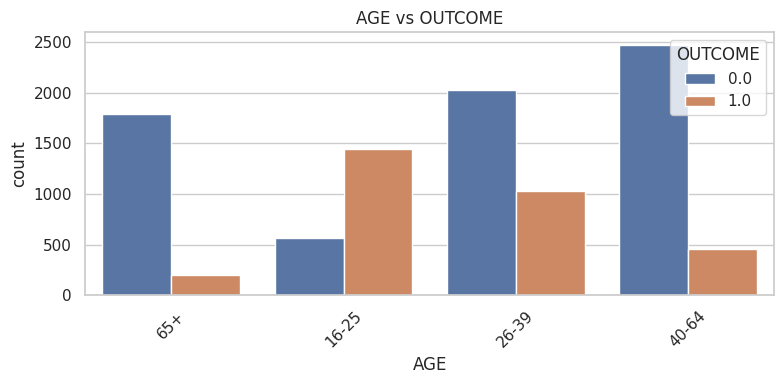

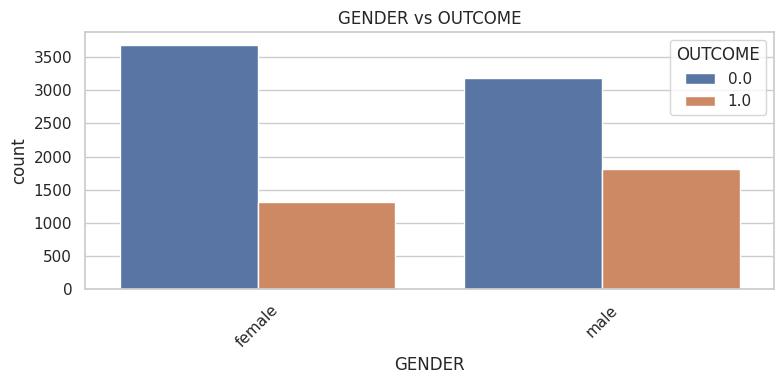

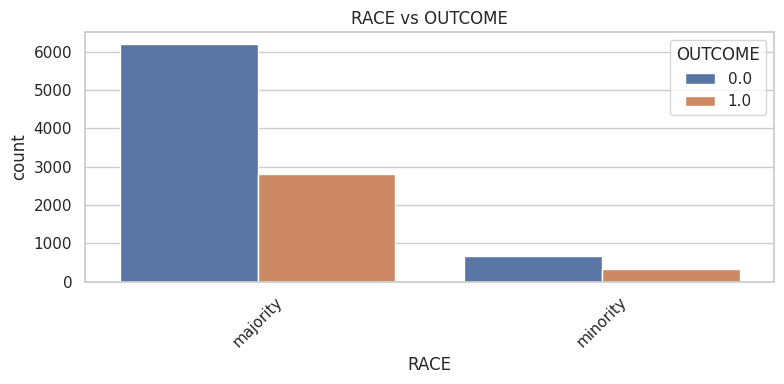

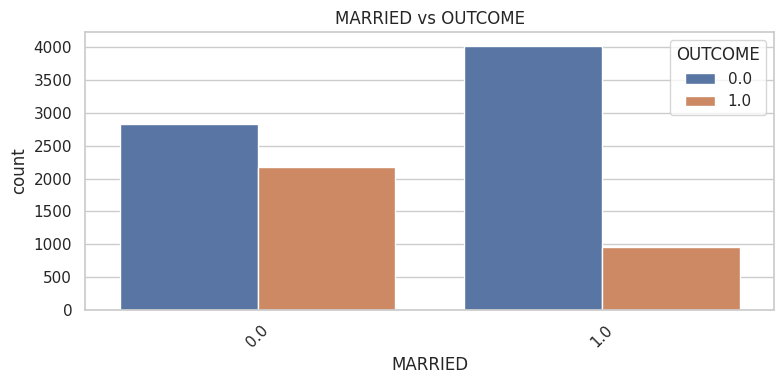

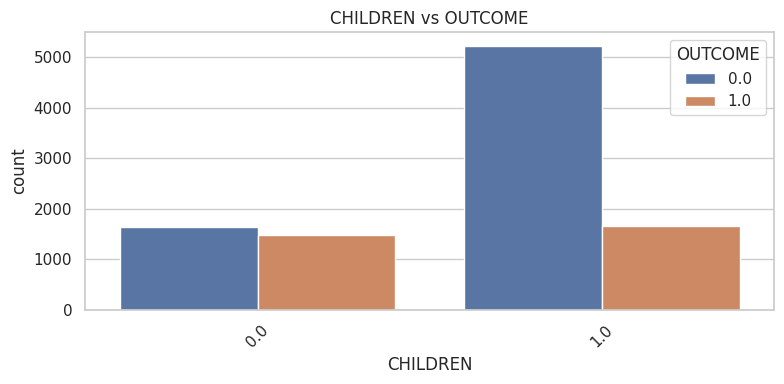

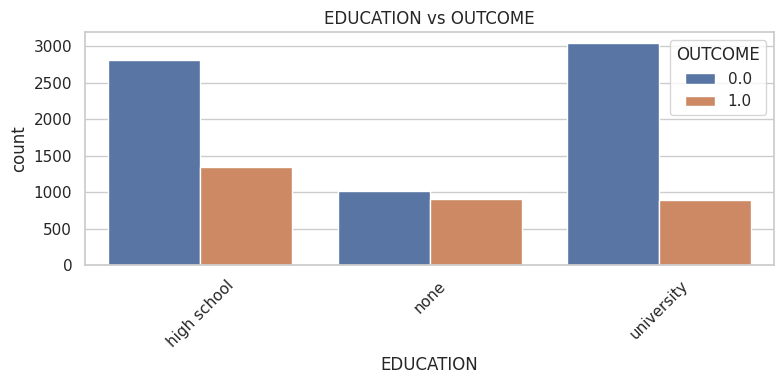

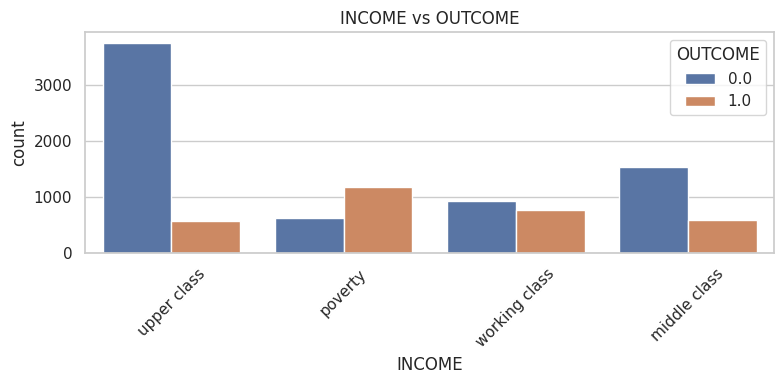

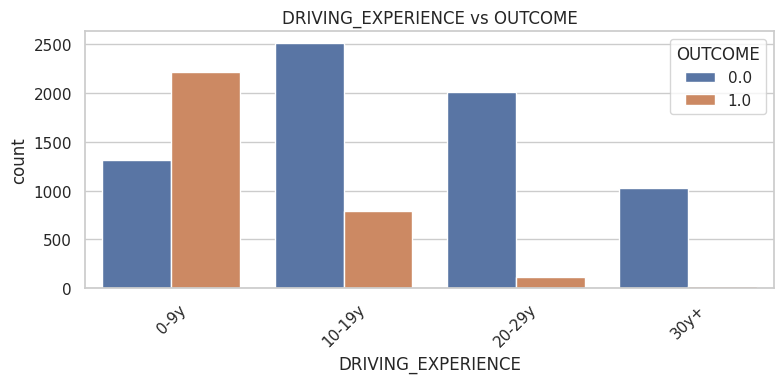

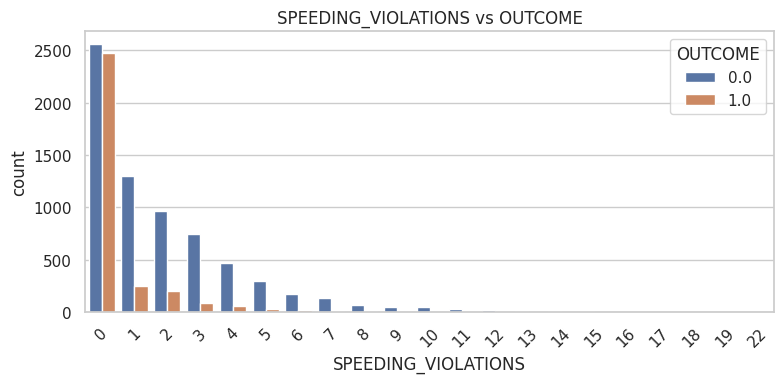

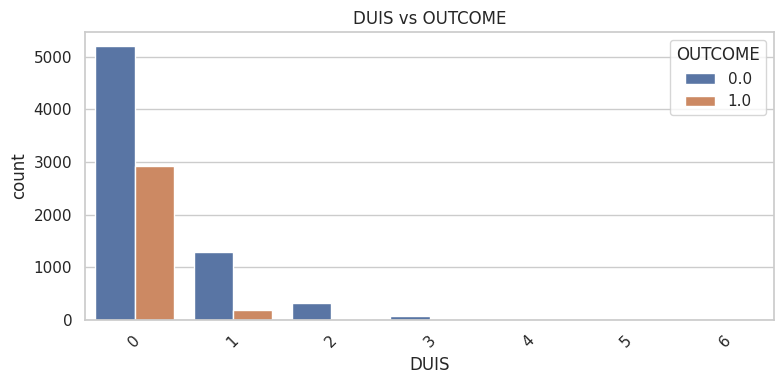

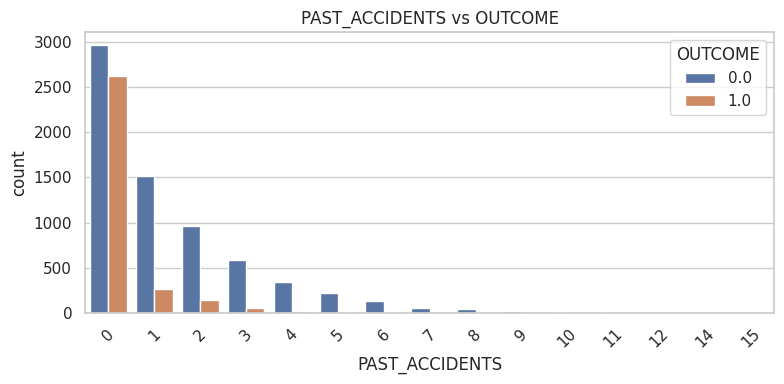

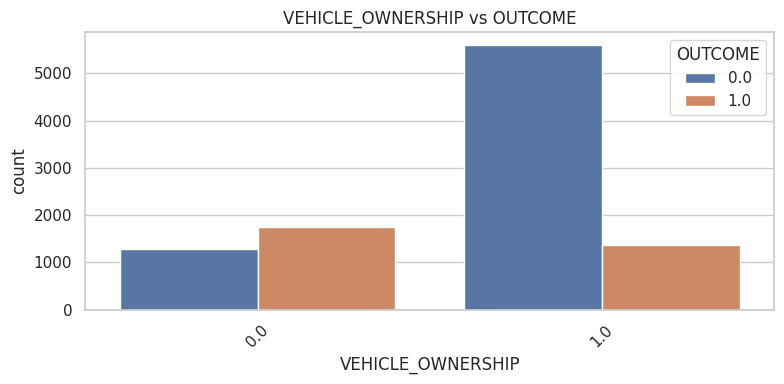

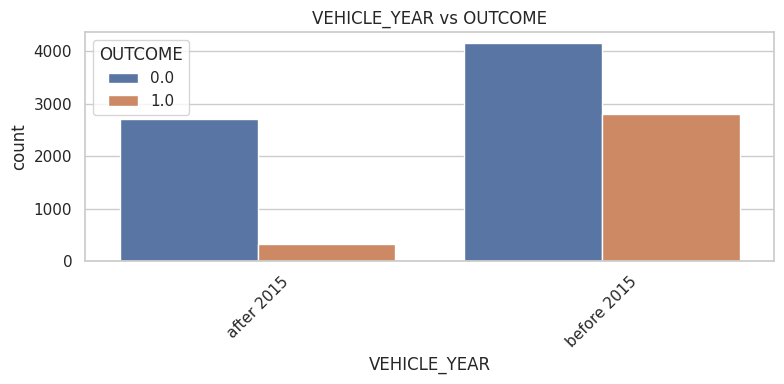

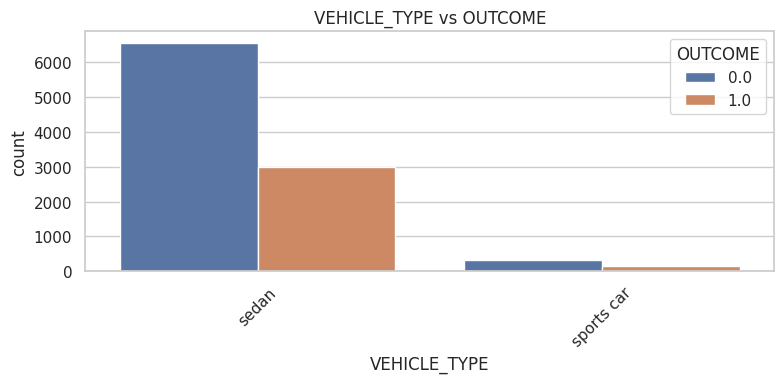

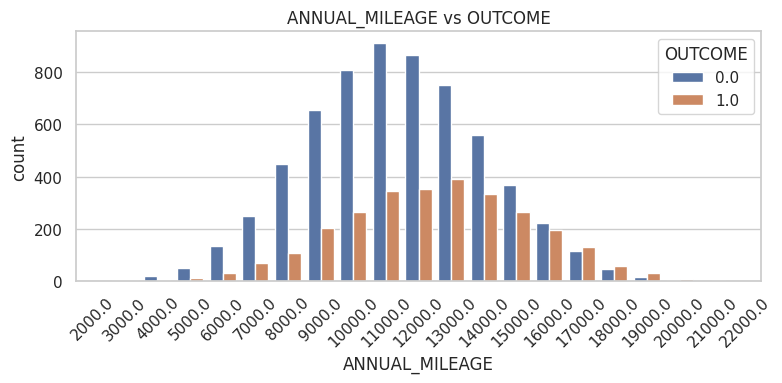

In [ ]:
# Group features logically for nested loop visualization
features = [

    ['AGE', 'GENDER', 'RACE', 'MARRIED', 'CHILDREN'],


    ['EDUCATION', 'INCOME'],


    ['DRIVING_EXPERIENCE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],


    ['VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'VEHICLE_TYPE', 'ANNUAL_MILEAGE']
]



for group in features:
    for col in group:
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, hue='OUTCOME', data=df)
        plt.title(f'{col} vs OUTCOME')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


##  Driving Behavior Insights

- **Driving Experience:** New drivers (0–9 years) have the highest claim rate. The more experience, the fewer claims.  
- **Speeding Violations:** More speeding tickets → higher chance of filing a claim.  
- **DUIs:** Drivers with DUIs are much more likely to make claims.  
- **Past Accidents:** A clear pattern — previous accidents often lead to future claims.



##  Vehicle & Usage Insights

- **Vehicle Ownership:** Non-owners file slightly more claims than owners.  
- **Vehicle Year:** Older cars (before 2015) show more claims than newer ones.  
- **Vehicle Type:** Sports-car owners make relatively more claims than sedan drivers.  
- **Annual Mileage:** Higher yearly mileage brings slightly more claims due to greater exposure.




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  ANNUAL_MILEAGE       9043 non-null   float64
 12  VEHICLE_TYPE         10000 non-null  object 
 13  SPEEDING_VIOLATIONS  10000 non-null  int64  
 14  DUIS                 10000 non-null  int64  
 15  PAST_ACCIDENTS       10000 non-null  

## Data manipulatoin

In [ ]:
# Check for missing data
df.isnull().sum().sort_values(ascending=False)


,0
CREDIT_SCORE,982
ANNUAL_MILEAGE,957
AGE,0
DRIVING_EXPERIENCE,0
GENDER,0
EDUCATION,0
INCOME,0
VEHICLE_OWNERSHIP,0
RACE,0
VEHICLE_YEAR,0


In [ ]:
# check for inconsistancy
Categorical_features = df.select_dtypes(include=['object']).columns

for col in Categorical_features:
  print(f"Values for {col} are:")
  print(df[col].value_counts(), "\n")

Values for AGE are:
AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64 

Values for GENDER are:
GENDER
female    5010
male      4990
Name: count, dtype: int64 

Values for RACE are:
RACE
majority    9012
minority     988
Name: count, dtype: int64 

Values for DRIVING_EXPERIENCE are:
DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64 

Values for EDUCATION are:
EDUCATION
high school    4157
university     3928
none           1915
Name: count, dtype: int64 

Values for INCOME are:
INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64 

Values for VEHICLE_YEAR are:
VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: count, dtype: int64 

Values for VEHICLE_TYPE are:
VEHICLE_TYPE
sedan         9523
sports car     477
Name: count, dtype: int64 



In [ ]:
# df[['CREDIT_SCORE','ANNUAL_MILEAGE']].describe()

In [ ]:
# Review unique values in key categorical columns
for col in Categorical_features:
    print(f"{col}: {df[col].unique()}")


AGE: ['65+' '16-25' '26-39' '40-64']
GENDER: ['female' 'male']
RACE: ['majority' 'minority']
DRIVING_EXPERIENCE: ['0-9y' '10-19y' '20-29y' '30y+']
EDUCATION: ['high school' 'none' 'university']
INCOME: ['upper class' 'poverty' 'working class' 'middle class']
VEHICLE_YEAR: ['after 2015' 'before 2015']
VEHICLE_TYPE: ['sedan' 'sports car']


In [ ]:
binary_cols = ['VEHICLE_OWNERSHIP', 'MARRIED', 'OUTCOME']

for col in binary_cols:
    print(f"{col}: {df[col].unique()}")

VEHICLE_OWNERSHIP: [1. 0.]
MARRIED: [0. 1.]
OUTCOME: [0. 1.]


In [ ]:
df[binary_cols] = df[binary_cols].astype(int)


In [ ]:
df[binary_cols].dtypes

,0
VEHICLE_OWNERSHIP,int64
MARRIED,int64
OUTCOME,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  int64  
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  int64  
 10  CHILDREN             10000 non-null  float64
 11  ANNUAL_MILEAGE       9043 non-null   float64
 12  VEHICLE_TYPE         10000 non-null  object 
 13  SPEEDING_VIOLATIONS  10000 non-null  int64  
 14  DUIS                 10000 non-null  int64  
 15  PAST_ACCIDENTS       10000 non-null  

In [ ]:
def bin_age(age):
    if age == '16-25':
        return 'Young'

    elif age == '26-39':
      return 'Youth'

    elif age == '40-64':
      return 'Adult'

    elif age == '65+':
      return 'Senior'

    else:
      return 'Unknown'


In [ ]:
df['AGE'] = df['AGE'].apply(bin_age)

df['AGE'].value_counts()

,count
AGE,
Youth,3063
Adult,2931
Young,2016
Senior,1990


In [ ]:
def bin_driving_experience(experience):

  if experience == '0-9y':
    return 'New Driver'

  elif experience == '10-19y':
    return 'Seasoned Driver'

  elif experience == '20-29y':
    return 'Expert Driver'

  elif experience == '30y+':
    return 'Veteran Driver'



In [ ]:
df['DRIVING_EXPERIENCE'] = df['DRIVING_EXPERIENCE'].apply(bin_driving_experience)

df['DRIVING_EXPERIENCE'].value_counts()

,count
DRIVING_EXPERIENCE,
New Driver,3530
Seasoned Driver,3299
Expert Driver,2119
Veteran Driver,1052


In [ ]:
df['OUTCOME'].value_counts()

,count
OUTCOME,
0,6867
1,3133


## Data PreProcessing

In [ ]:
X = df.drop(columns=['OUTCOME'])
y = df['OUTCOME']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
num_cols = X_train.select_dtypes('number').columns

num_imputer = SimpleImputer(strategy='median')

num_scaler = StandardScaler()

num_pipe = make_pipeline(num_imputer, num_scaler)
num_tuple = ('numerical', num_pipe, num_cols)


ord_cols = ['AGE','EDUCATION','DRIVING_EXPERIENCE','INCOME']
age_order = ['Young', 'Youth', 'Adult', 'Senior']
education_order = ['none','high school', 'university']
driving_order =  ['New Driver', 'Seasoned Driver', 'Expert Driver', 'Veteran Driver']
income_order  = ['poverty','working class','middle class','upper class']

order_list = [age_order, education_order, driving_order, income_order]

ord_encoder = OrdinalEncoder(categories=order_list)
ord_tuple = ('ordinal', ord_encoder, ord_cols)

nominal_cols = X_train.select_dtypes('object').drop(columns = ord_cols).columns
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
nominal_tuple = ('categorical', ohe_encoder, nominal_cols)

preprocessor = ColumnTransformer(transformers=[num_tuple, ord_tuple, nominal_tuple], verbose_feature_names_out=False)


I’m planning to use a Random Forest model because it handles both categorical and numerical features well, works effectively for binary classification, and gives strong baseline performance. I might also test Logistic Regression for comparison and interpretability.

In [ ]:
RandomF_defult = RandomForestClassifier(random_state=42)
RandomF_defult_pipe = make_pipeline(preprocessor, RandomF_defult)
RandomF_defult_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('ordinal',
                                                  OrdinalE...
                                                                              'working '
                                                                              'class',
                                                                              'middle '
                                                                              'class',
                                                                              'upper '
                                                                              'class']]),
                                                  ['AGE', 'EDUCATION',
                                                   'DRIVING_EXPERIENCE',
                                                   'INCOME']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['GENDER', 'RACE', 'VEHICLE_YEAR', 'VEHICLE_TYPE'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
# X_train_prep.isna().sum()

In [ ]:
import sys
import os

drive_path = '/content/drive/MyDrive/DS project'

sys.path.append(drive_path)

In [ ]:
from EvaluationFunction import *


----------------------------------------------------------------------
 Classification Metrics: Training Data 
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     0.999     0.999      5144
           1      0.998     1.000     0.999      2356

    accuracy                          0.999      7500
   macro avg      0.999     0.999     0.999      7500
weighted avg      0.999     0.999     0.999      7500



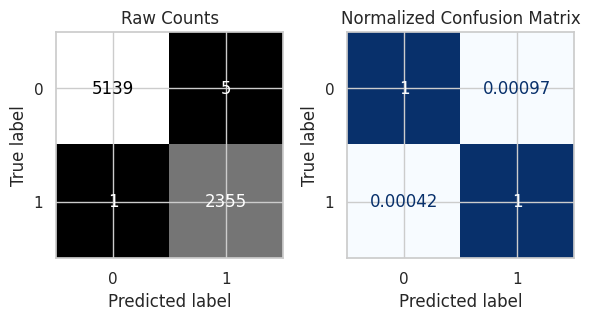


----------------------------------------------------------------------
 Classification Metrics: Test Data 
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.855     0.899     0.876      1723
           1      0.747     0.662     0.702       777

    accuracy                          0.825      2500
   macro avg      0.801     0.780     0.789      2500
weighted avg      0.821     0.825     0.822      2500



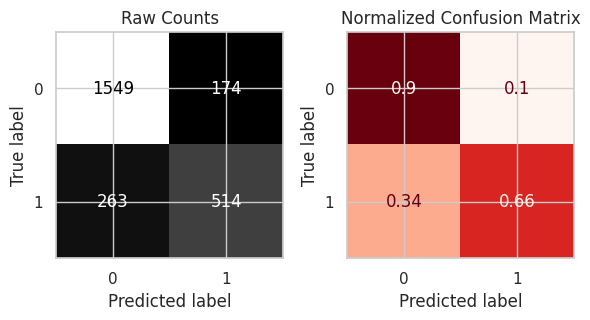

In [ ]:
evaluate_classification(RandomF_defult_pipe, X_train, y_train, X_test, y_test)


###  Model Evaluation – Random Forest (Default Pipeline)

#### **Training Performance**
The model performs almost perfectly on the training data:

This indicates that the model has learned the training data extremely well, but we have some **overfitting** when looking at test.

The confusion matrix confirms this:
- Nearly all training samples were correctly classified.
- Only **a few misclassifications** ( 5 out of 7,500).

---

#### **Test Performance**
On unseen (test) data:


The confusion matrix shows:
- Around **90%** of non-claim cases (class 0) are predicted correctly.  
- Only **66%** of claim cases (class 1) are detected correctly, meaning some claim cases are still misclassified as non-claims.

---




In [ ]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

In [ ]:
def plot_importances(importances, top_n=None, head_or_tail='tail', figsize=(8, 6)):
    # Sort importances in ascending order
    importances_sorted = importances.sort_values(ascending=True)

    # Select top_n features from head or tail
    if top_n:
        if head_or_tail == 'head':
            selected = importances_sorted.head(top_n)
        else:
            selected = importances_sorted.tail(top_n)
    else:
        selected = importances_sorted

    # Plot
    ax = selected.plot(kind='barh', figsize=figsize)
    ax.set_title("Feature Importances")
    ax.set_xlabel("Importance")
    ax.set_ylabel("Feature")
    plt.tight_layout()
    plt.show()


In [ ]:
def get_importances(model, feature_names=None, sort=False, ascending=True):

    importances = model.feature_importances_

    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(len(importances))]

    series = pd.Series(importances, index=feature_names, name="Feature Importance")

    if sort:
        series = series.sort_values(ascending=ascending)

    return series


In [ ]:
from sklearn.inspection import permutation_importance

r = permutation_importance(RandomF_defult_pipe, X_test, y_test,n_repeats =10, random_state = 42)

permutation_importances = pd.Series(r['importances_mean'],index=X_test.columns, name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances




,permutation importance
DRIVING_EXPERIENCE,0.05460
VEHICLE_OWNERSHIP,0.04528
VEHICLE_YEAR,0.04360
GENDER,0.01148
PAST_ACCIDENTS,0.01044
AGE,0.00320
MARRIED,0.00308
RACE,0.00160
VEHICLE_TYPE,-0.00004
ANNUAL_MILEAGE,-0.00008


In [ ]:
# Compute permutation importances
perm = permutation_importance( RandomF_defult_pipe, X_test, y_test, scoring='roc_auc', n_repeats=20, random_state=42, n_jobs=-1)

# Build a Series indexed by original feature names
perm_importances = pd.Series(perm.importances_mean, index=X_test.columns, name='Permutation Importance')

# Your plotting helper (tail = largest)
# plot_importances(perm_importances, top_n=10, head_or_tail='tail', figsize=(8,6));



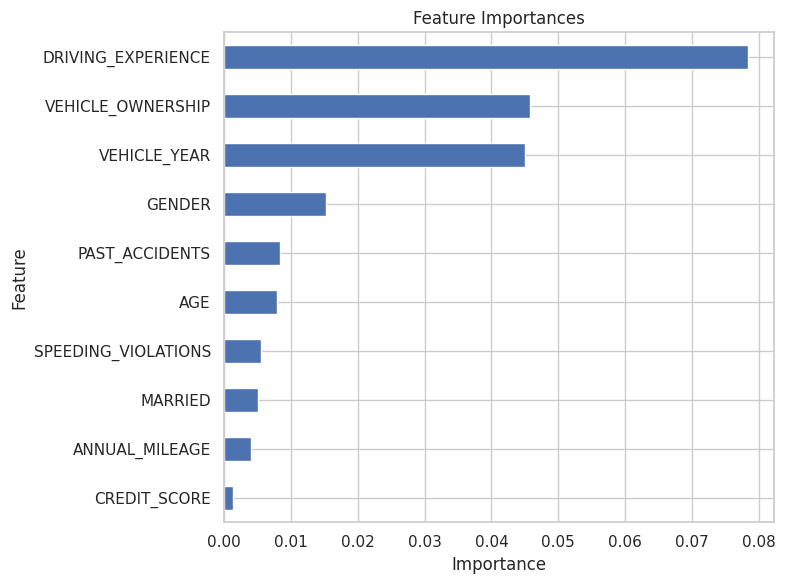

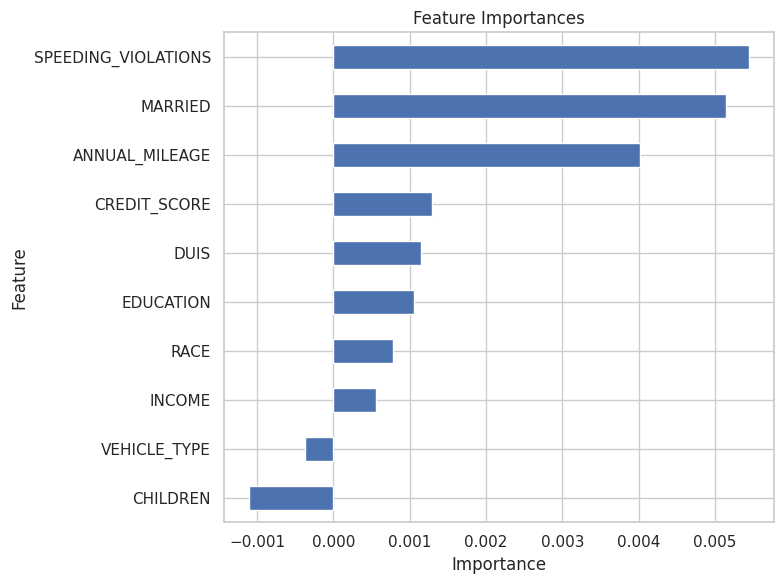

In [ ]:
plot_importances(perm_importances, top_n=10, head_or_tail='tail')
plot_importances(perm_importances, top_n=10, head_or_tail='head')

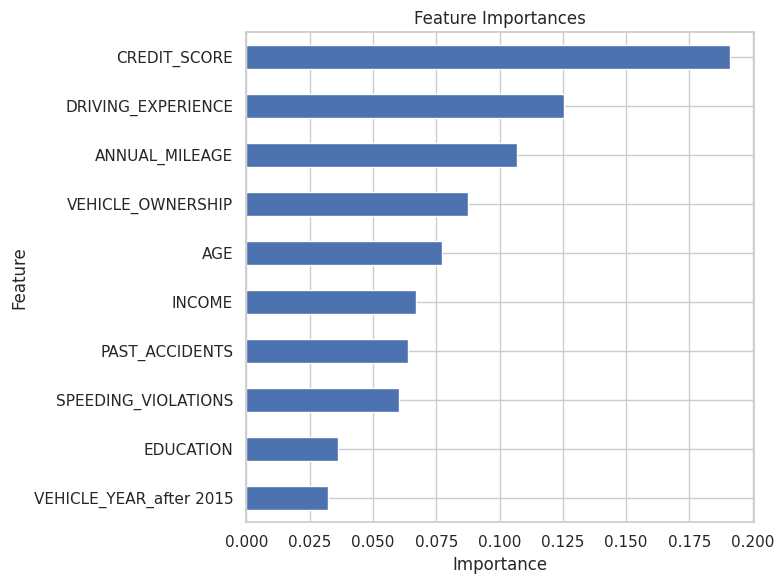

In [ ]:
# Get transformed (expanded) feature names from the ColumnTransformer
feature_names_expanded = RandomF_defult_pipe.named_steps['columntransformer'].get_feature_names_out()

# Pull importances from the fitted RandomForest
rf = RandomF_defult_pipe.named_steps['randomforestclassifier']
rf_importances = pd.Series(rf.feature_importances_, index=feature_names_expanded, name='RF Importance')

# Plot top 10 expanded features
plot_importances(rf_importances, top_n=10, head_or_tail='tail', figsize=(8,6));


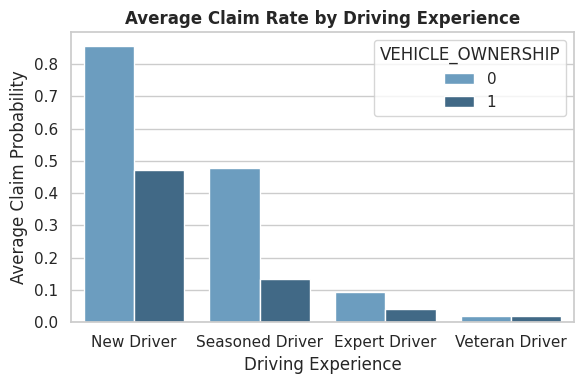

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='DRIVING_EXPERIENCE', y='OUTCOME',hue= 'VEHICLE_OWNERSHIP', data=df, errorbar=None, palette='Blues_d')
plt.title('Average Claim Rate by Driving Experience', fontsize=12, fontweight='bold')
plt.ylabel('Average Claim Probability')
plt.xlabel('Driving Experience')
plt.tight_layout()
plt.show()


##  Driving Experience vs Claim Likelihood (by Vehicle Ownership)

This chart shows how claim probability changes with driving experience and vehicle ownership.

- **New Drivers** have the highest claim probability, especially among those who **don’t own a vehicle**.  

- As experience increases, claim rates drop sharply — particularly for **Veteran Drivers**, who almost never file claims.  

- Among all groups, **vehicle owners** consistently show lower claim rates than non-owners.



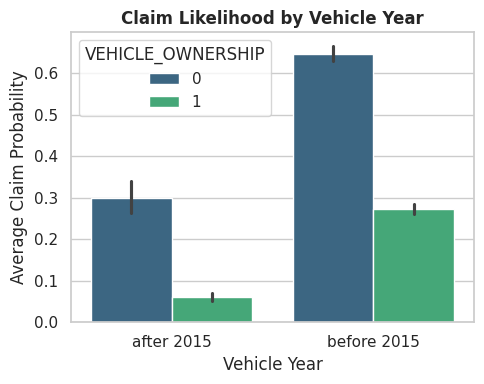

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot(x='VEHICLE_YEAR', y='OUTCOME',hue='VEHICLE_OWNERSHIP', data=df, palette='viridis')
plt.title('Claim Likelihood by Vehicle Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Claim Probability')
plt.xlabel('Vehicle Year')
plt.tight_layout()
plt.show()


##  Vehicle Year vs Claim Likelihood (by Vehicle Ownership)

This chart compares claim probabilities for older and newer vehicles, also distinguishing between vehicle owners and non-owners.

- Claims are most frequent among **non-owners of older vehicles (before 2015)**.  
- **Vehicle owners with newer cars (after 2015)** have the **lowest claim rates**, likely benefiting from better safety technology and maintenance.  
- Ownership reduces claim likelihood across both old and new vehicles.



In [ ]:
from sklearn.decomposition import PCA

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_prep)
X_test_pca  = pca.transform(X_test_prep)
X_train_pca.head()

,pca0,pca1,pca2
4901,0.710885,2.021665,-0.647060
4375,-3.495691,-0.517901,0.106819
6698,1.327776,0.787026,-0.320839
9805,-2.017614,0.380030,2.809657
1101,-3.153354,-0.854204,-1.377417


In [ ]:
X_train_combined = pd.concat([X_train_prep, X_train_pca], axis=1)
X_test_combined  = pd.concat([X_test_prep, X_test_pca], axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_combined, y_train)
y_pred_pca = model_pca.predict(X_test_combined)

print("Model with PCA Features:")
print(classification_report(y_test, y_pred_pca))


Model with PCA Features:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1723
           1       0.77      0.67      0.71       777

    accuracy                           0.83      2500
   macro avg       0.81      0.79      0.80      2500
weighted avg       0.83      0.83      0.83      2500



###  Model Evaluation – Random Forest with PCA Features

#### **Overview**
After applying **Principal Component Analysis (PCA)** to extract three principal components and combining them with the original features, the Random Forest model was retrained and evaluated.

---


The performance slightly improved compared to the baseline model (without PCA):
- Accuracy increased from **0.825 → 0.83**
- Recall for class 1 (claims) improved marginally, indicating a slightly better ability to detect claim cases.
- The macro and weighted averages of F1-scores remained balanced around **0.79–0.83**.

---

#### **Interpretation**
- The PCA transformation introduced new linear combinations of the original features that captured more variance while reducing noise.
- The improvement, though small, shows that **dimensionality reduction** helped the model generalize better.
- PCA also contributes to more efficient computation and may reduce multicollinearity between correlated predictors.



In [ ]:
explained = pd.Series(pca.explained_variance_ratio_, name='Explained Variance Ratio')
explained

,Explained Variance Ratio
0,0.349910
1,0.119547
2,0.097070


###  PCA – Explained Variance Ratio

The explained variance ratio represents how much of the dataset’s total variance is captured by each principal component.  


---

#### **Interpretation**
- **PC1** captures **approximately 35%** of the total variance, making it the most significant contributor to the dimensionality reduction.
- **PC2** and **PC3** together capture about **22%** more variance, meaning that the first three components explain roughly **57% of the total dataset variance**.

This indicates that:
- The PCA transformation successfully compresses the feature space while retaining most of the meaningful information.  
- However, around **43%** of the variance remains unexplained, implying that the original features still carry some unique patterns that were not captured by these three components.




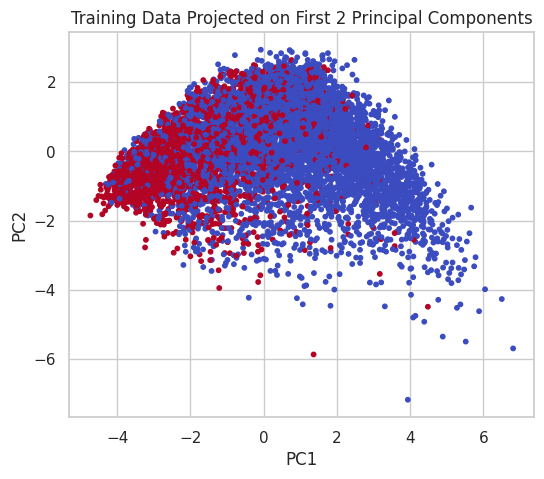

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X_train_pca.iloc[:,0], X_train_pca.iloc[:,1], c=y_train, cmap='coolwarm', s=10)
plt.title('Training Data Projected on First 2 Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [ ]:
X_train_pca.columns

Index(['pca0', 'pca1', 'pca2'], dtype='object')

In [ ]:
def update_scatter3d(fig):
  fig.update_traces({'marker':{'size':3}})
  fig.show(config={'scrollZoom':False})

import plotly.express as px

# principal_components = pca.fit_transform(X_train_pca)
principal_components = X_train_pca
plot_df_pca = pd.concat([principal_components, df['OUTCOME']], axis=1)

fig = px.scatter_3d(plot_df_pca, x='pca0', y='pca1', z='pca2', width=800, height=600, color = "OUTCOME", template = 'plotly_dark')
update_scatter3d(fig)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:

X_train_prep_df = pd.DataFrame(X_train_prep, columns=preprocessor.get_feature_names_out())
Ks = range(2, 9)
sil = []
for k in Ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    km.fit(X_train_prep_df)
    sil.append(silhouette_score(X_train_prep_df, km.labels_))

best_k = Ks[int(np.argmax(sil))]
best_sil = max(sil)
print(f"Best k = {best_k}  (silhouette = {best_sil:.3f})")


kmeans = KMeans(n_clusters=best_k, n_init=20, random_state=42)

kmeans.fit(X_train_prep_df) # Fit KMeans on the training data only

tr_clusters = kmeans.labels_ # Get labels for training data
te_clusters = kmeans.predict(X_test_prep) # Predict labels for test data

tr_dists = kmeans.transform(X_train_prep_df)  # distances to each centroid
te_dists = kmeans.transform(X_test_prep)

# Concatenate engineered features
cluster_col = 'kmeans_cluster'
dist_cols = [f'cluster_dist_{i}' for i in range(best_k)]

Best k = 2  (silhouette = 0.216)


----------------------------------------------------------------------
 Classification Metrics: Training Data 
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     0.999     0.999      5144
           1      0.998     1.000     0.999      2356

    accuracy                          0.999      7500
   macro avg      0.999     0.999     0.999      7500
weighted avg      0.999     0.999     0.999      7500



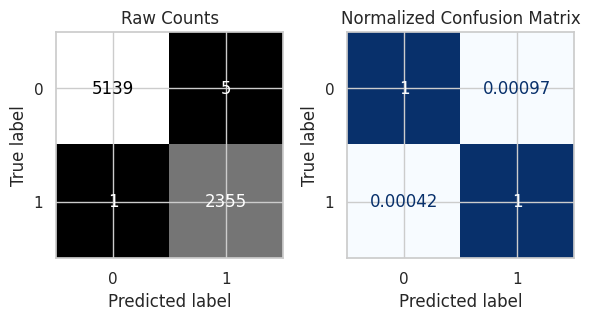


----------------------------------------------------------------------
 Classification Metrics: Test Data 
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.854     0.898     0.875      1723
           1      0.744     0.659     0.699       777

    accuracy                          0.824      2500
   macro avg      0.799     0.778     0.787      2500
weighted avg      0.820     0.824     0.820      2500



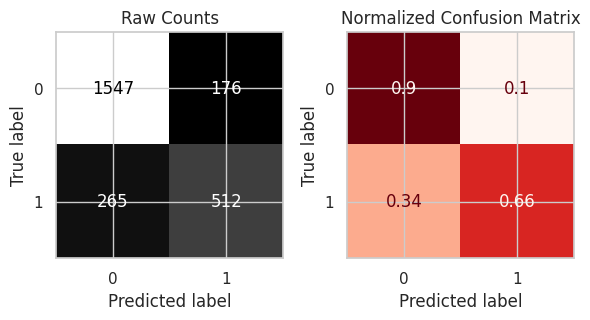

In [ ]:
# KMeans lables
X_train_prep['cluster'] = kmeans.labels_
X_test_prep['cluster'] = kmeans.predict(X_test_prep)

RandomF_defult.fit(X_train_prep, y_train)

evaluate_classification(RandomF_defult, X_train_prep, y_train, X_test_prep, y_test)

###  Model Evaluation – Random Forest with KMeans Engineered Features

#### **Overview**
In this stage, the dataset was enhanced by applying **KMeans clustering** as a feature engineering technique.  
Cluster labels and distances to each cluster centroid were added to the preprocessed data, allowing the Random Forest model to capture hidden group-level patterns in driver behavior.

---

#### **Training Performance**

The model performs **exceptionally well on the training data**, showing near-perfect accuracy and balance between precision and recall.  
However, this level of performance likely indicates **overfitting**, meaning the model has learned the training data patterns almost too precisely.

---

#### **Test Performance**

On unseen data, the model’s accuracy drops to **~82%**, with a moderate recall (0.659) for the claim class.  
This shows that while the model is still performing decently, it struggles to **generalize cluster-based relationships** as effectively as it fits them during training.

---

#### **Confusion Matrix Interpretation**
- The **majority class (non-claims)** is predicted with higher accuracy (≈90%), while the **minority class (claims)** has higher misclassification rates.
- False negatives (actual claims predicted as non-claims) remain a key challenge, as reflected by the recall score.


In [ ]:
#  TEST DataFrame with names
X_test_prep_df = pd.DataFrame(X_test_prep, columns=preprocessor.get_feature_names_out())

# Concatenate engineered features
cluster_col = 'kmeans_cluster'
dist_cols = [f'cluster_dist_{i}' for i in range(best_k)]

Xtr_eng = X_train_prep_df.copy()
Xtr_eng[cluster_col] = tr_clusters
# Assign the entire numpy array as new columns
Xtr_eng[dist_cols] = tr_dists


Xte_eng = X_test_prep_df.copy()
Xte_eng[cluster_col] = te_clusters
# Assign the entire numpy array as new columns
Xte_eng[dist_cols] = te_dists


print("Shapes with engineered features:", Xtr_eng.shape, Xte_eng.shape)

Shapes with engineered features: (7500, 23) (2500, 23)


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(C=1e12, max_iter=2000, solver='liblinear')

selector = SelectFromModel(log_reg)   # default threshold='mean' of |coef|
selector.fit(Xtr_eng, y_train)


mask = selector.get_support()
selected_cols = Xtr_eng.columns[mask]
print(f"Selected {mask.sum()} / {Xtr_eng.shape[1]} features")
print(selected_cols[:20])


Selected 7 / 23 features
Index(['VEHICLE_OWNERSHIP', 'PAST_ACCIDENTS', 'DRIVING_EXPERIENCE',
       'GENDER_female', 'RACE_minority', 'VEHICLE_YEAR_after 2015',
       'VEHICLE_YEAR_before 2015'],
      dtype='object')


### Embedded feature engineering

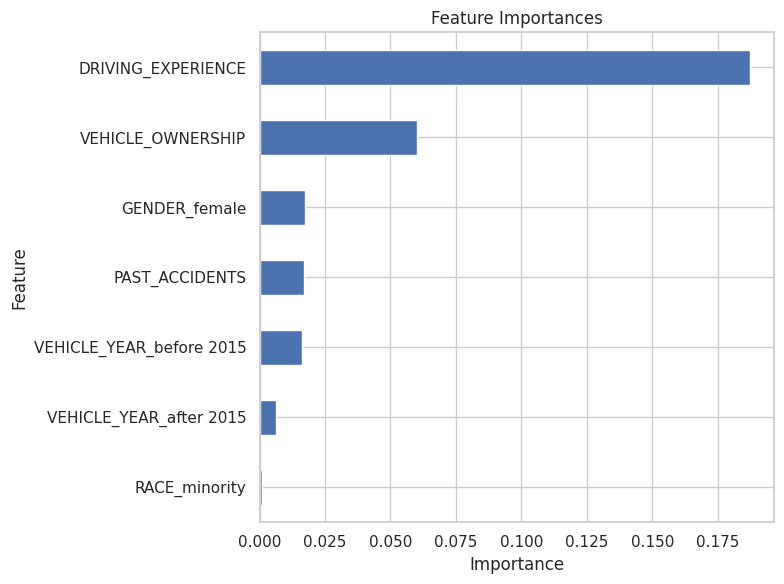

,perm_importance
RACE_minority,0.000997
VEHICLE_YEAR_after 2015,0.006141
VEHICLE_YEAR_before 2015,0.016396
PAST_ACCIDENTS,0.016927
GENDER_female,0.017308
VEHICLE_OWNERSHIP,0.060059
DRIVING_EXPERIENCE,0.187041


In [ ]:
# ---------------------------
# 4) Top-10 features via permutation importance (FINAL model)
# ---------------------------

# 1) Reduce to the embedded-selected columns (from your fitted selector)
selected_mask = selector.get_support()
selected_cols = Xtr_eng.columns[selected_mask]

X_train_final = Xtr_eng[selected_cols]
X_test_final  = Xte_eng[selected_cols]

# 2) Fit the final model on the selected features
#    (Reuse RandomF_defult if it already exists; otherwise instantiate.)
try:
    model_final = RandomF_defult
except NameError:
    from sklearn.ensemble import RandomForestClassifier
    model_final = RandomForestClassifier(random_state=42)

model_final.fit(X_train_final, y_train)

# 3) Permutation importance on the TEST split (robust to scaling/encoding)
from sklearn.inspection import permutation_importance
r = permutation_importance(
    model_final,
    X_test_final,
    y_test,
    n_repeats=20,
    random_state=42,
    n_jobs=-1,
    scoring='roc_auc'
)

# 4) Build a Series and plot Top-10 with your helper
perm_series = pd.Series(r.importances_mean, index=selected_cols, name='permutation importance')
perm_series = perm_series.sort_values(ascending=True)

# Show the Top-10 (tail) bar chart
plot_importances(perm_series, top_n=10, head_or_tail='tail', figsize=(8,6))

# Also print the Top-10 as a table if you want
top10 = perm_series.tail(10)
display(top10.to_frame('perm_importance'))


----------------------------------------------------------------------
 Classification Metrics: Training Data 
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.862     0.909     0.885      5144
           1      0.775     0.681     0.725      2356

    accuracy                          0.838      7500
   macro avg      0.818     0.795     0.805      7500
weighted avg      0.834     0.838     0.835      7500



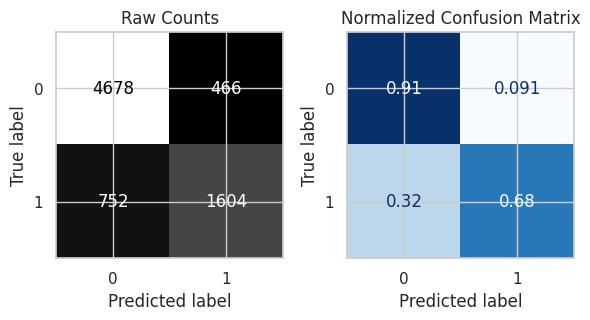


----------------------------------------------------------------------
 Classification Metrics: Test Data 
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0      0.856     0.906     0.880      1723
           1      0.760     0.662     0.708       777

    accuracy                          0.830      2500
   macro avg      0.808     0.784     0.794      2500
weighted avg      0.826     0.830     0.827      2500



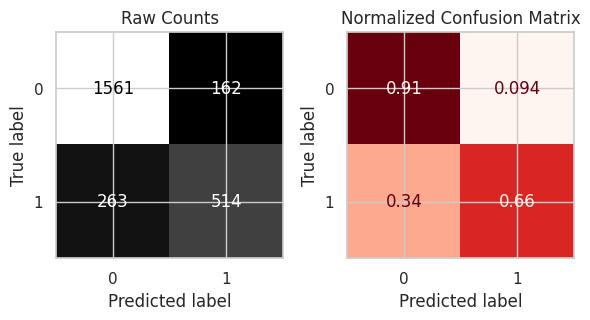

In [ ]:
# Evaluate the model with Embedded
evaluate_classification(model_final, X_train_final, y_train, X_test_final, y_test)

###  Model Evaluation – Embedded Feature Selection (Logistic Regression Coefficients)

#### **Overview**
In this phase, an **Embedded Feature Selection** approach was applied using **Logistic Regression coefficients** via `SelectFromModel`.  
This method automatically identifies and retains the most informative features during model training, based on their learned importance weights.  
The selected subset of features was then used to train a **Random Forest Classifier** for final evaluation.

---

#### **Training Performance**


The training data results show **strong overall accuracy** (≈84%) and a good balance between precision and recall.  
Compared to previous models, the slightly lower recall (0.68) indicates that while the model identifies most positive cases, some claims are still misclassified as non-claims.

---

#### **Test Performance**


Performance on unseen data remains **highly consistent** with training results, showing good generalization.  
The recall score (0.66) confirms that the model is still able to capture a majority of true claim cases, while maintaining good precision.  
The **macro and weighted F1-scores (~0.79–0.83)** reflect a balanced performance across both classes.

---

#### **Confusion Matrix Analysis**
- **True Negatives (0→0):** ~91% of non-claims correctly predicted  
- **True Positives (1→1):** ~66–68% of claims correctly identified  
- **False Negatives (1→0):** ~32–34%, indicating missed claim predictions  
- The normalized confusion matrix shows that while the model favors the majority class slightly, it still effectively captures minority class patterns.

---

#### **Interpretation**
- The embedded feature selection method reduced model complexity while **preserving predictive power**.  
- The **accuracy (≈83%)** and **F1-score stability** across training and testing confirm **better generalization** compared to the earlier KMeans-only model.  
- Slightly lower recall suggests that additional tuning (e.g., threshold adjustment or class weighting) could further enhance minority class detection.

---

#### **Conclusion**
The **Embedded Feature Selection** approach improved interpretability and efficiency by automatically selecting impactful features and discarding irrelevant ones.  
With only the most meaningful predictors, the Random Forest model achieved:
- Strong performance consistency between training and testing,
- Reduced overfitting,
- And a clearer understanding of feature importance and model behavior.

Overall, this method represents a solid trade-off between **performance, interpretability, and efficiency**.
